In [24]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import csv
import StringIO
import requests
import zipfile
import statsmodels
from scipy.stats import norm
from scipy.stats import rv_continuous

%pylab inline

import os
import json

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### Directions

Use two tests; KS, AD, KL, or Chi Squared (goodness of fit), to test whether a Gaussian model for age distribution of Citi Bike drivers is sensible or if there is a better fit wth another model. These tests will tell you how well the selected distribution fits the data; the test statistic will provide some 

Test the normal distribution (Gaussain) and one other distribution; Poisson, Binomial, Chi Squared, or Log Normal. 

#### KS Test
Determines whether a sample comes from a population with a specific distribution. It does not require the population distribution to be normal.

H0: The data follow the specified distribution.

HA: The data do not follow the specified distribution.

The hypothesis regarding the distributional form is rejected at the chosen significance level (alpha) if the test statistic, D, is greater than the critical value obtained from a table. 

#### Anderson-Darling Test
The Anderson-Darling procedure is a general test to compare the fit of an observed cumulative distribution function to an expected cumulative distribution function. This test gives more weight to the tails than the Kolmogorov-Smirnov test.

H0: The data follow the specified distribution.

HA: The data do not follow the specified distribution.

The hypothesis regarding the distributional form is rejected at the chosen significance level (alpha) if the test statistic, A2, is greater than the critical value obtained from a table.

#### Chi-Squared Test
The Chi-Squared test is used to determine if a sample comes from a population with a specific distribution. This test is applied to binned data, so the value of the test statistic depends on how the data is binned. There are no specific rules for selecting the number of bins, however there are several formulas that can be used to calculate this number based on 'n'. 

H0: The data follow the specified distribution.

HA: The data do not follow the specified distribution.

The hypothesis regarding the distributional form is rejected at the chosen significance level if the test statistic is greater than the critical value defined as 'the Chi-Squared inverse CDF with k-1 degrees of freedom and a significance level of significance level.

#### Kullback–Leibler Test
A measure of the difference between two probability distributions P and Q. It is not symmetric in P and Q. In applications, P typically represents the "true" distribution of data, observations, or a precisely calculated theoretical distribution, while Q typically represents a theory, model, description, or approximation of P.

In [25]:
datestring = '201604'
r = requests.get("https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip") 
z = zipfile.ZipFile(StringIO.StringIO(r.content))
citi_csv = z.extractall('Users/kristikorsberg/Documents')
citi_df = pd.read_csv('Users/kristikorsberg/Documents' + "/" + datestring + "-citibike-tripdata.csv")
#citi_df = pd.read_csv(PUI2016 + "/" + datestring + "-citibike-tripdata.csv")
#citi_df.head(10)

In [65]:
citi_df['age'] = 2016 - citi_df['birth year'][(citi_df['usertype'] == 'Subscriber')]
#citi_df.head()
#drop rows for anyone over 100 (born before 1920)
age = np.array(citi_df['age'].dropna())
print(age)
print(len(age))

[ 32.  46.  30. ...,  41.  51.  34.]
882679


In [31]:
age_mean = np.mean(age)
print(age_mean)

38.7522564828


In [32]:
age_std = np.std(age)
print(age_std)

11.7330444007


In [35]:
#why are we including mean and standard deviation? why is this imperative to getting the right
#answer? why is the p-value always zero? 
ks_test = scipy.stats.kstest(age, 'norm', args = (age_mean, age_std))
print(ks_test)

KstestResult(statistic=0.10764117026760028, pvalue=0.0)


### KS Test for Normal Distribution

H0: The sample distribution of the ages of Citi Bike users comes from a normal distribution.

HA: The distribution of the ages of Citi Bike users does not fit a normal distribution. The age of Citi Bike users is not normally distributed. 

P-value: .05

(array([  1.69000000e+02,   3.97100000e+03,   4.04390000e+04,
          1.72471000e+05,   3.17461000e+05,   2.50557000e+05,
          8.44440000e+04,   1.23960000e+04,   7.48000000e+02,
          2.30000000e+01]),
 array([-14.10208749,  -2.89577725,   8.31053299,  19.51684323,
         30.72315347,  41.92946371,  53.13577395,  64.34208419,
         75.54839443,  86.75470466,  97.9610149 ]),
 <a list of 10 Patch objects>)

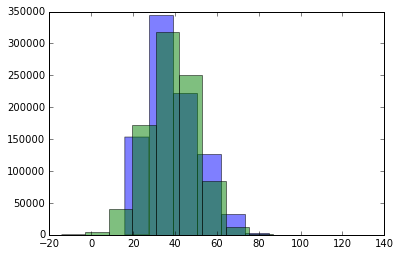

In [64]:
pl.hist(age, alpha = .5)
pl.hist(scipy.stats.norm.rvs(loc=age_mean, scale=age_std, size=len(age)), alpha=.5)

In [68]:
D = .1076 
critical_value = 1.36/sqrt(882679)
print(D)
print(critical_value)

0.1076
0.00144756312428


#### KS Statistic Results for Normal Distribution

We can reject the null hypothesis, which states that the sample represents a Poisson distribution because the D statistic, 0.569155, is greater than the critical value, 0.00144756312428, at N = 882679 at the .05 significance level. 

In [42]:
scipy.stats.poisson?

### KS Test for Poisson Distribution

H0: The distribution of the ages of Citi Bike users fits a Poisson distribution.

HA: The distribution of the ages of Citi Bike users does not fit a Poisson distribution. 

P-value: .05

In [45]:
ks_pois = scipy.stats.kstest(age, 'poisson', args = (age_mean, age_std))
print(ks_pois)

KstestResult(statistic=0.56915540706059997, pvalue=0.0)


#### KS Test Results for Poisson Distribution

We can reject the null hypothesis, which states that the sample represents a Poisson distribution because the D statistic, 0.569155, is greater than the critical value, 0.00144756312428, at N = 882679 at the .05 significance level. 

### AD Test for Normal Distribution

H0: The distribution of the ages of Citi Bike users follows a normal distribution.

HA: The distribution of the ages of Citi Bike users does not fit a normal distribution. 

In [57]:
ad_norm = scipy.stats.anderson(age, 'norm')
print(ad_norm)

AndersonResult(statistic=13428.484617782873, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


#### AD Test Results for Normal Distribution

We can reject the null hypothesis, which states that the sample represents a normal distribution because the AD statistic, 13428.4846, is greater than all critical values at N = 882679. The critical values at 15%, 10%, 5%, 2.5%, and 1% are all smaller than the test statistic.

### AD Test for Exponential Distribution

H0: The age of Citi Bike users follows the exponential distribution.

HA: The age of Citi Bike users does not follow the exponential distribution.

In [60]:
ad_expon = scipy.stats.anderson(age, 'expon')
print(ad_expon)

AndersonResult(statistic=203597.47336880653, critical_values=array([ 0.922,  1.078,  1.341,  1.606,  1.957]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


#### AD Test Results for Exponential Distribution

We can reject the null hypothesis, which states that the sample represents an exponential distribution because the AD statistic, 203597.4733688, is greater than all critical values at N = 882679. The critical values at 15%, 10%, 5%, 2.5%, and 1% are all smaller than the test statistic.